# Wedding FOM: To Optimize Cost Or Not?
T-Lind

In [1]:
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from ptcr2.fom import FOM

config_file = 'samples/wedding_fom.json'

with open(config_file) as f:
    spec = json.loads(f.read())


In [ ]:
wedding_fom_cost = FOM()
start = timer()
wedding_fom_cost.compute_optimal_policy(spec, cost_based=True)
end = timer()

print('Time elapsed to compute cost-based optimal policy: ', end - start)

In [ ]:
wedding_fom_no_cost = FOM()
start = timer()
wedding_fom_no_cost.compute_optimal_policy(spec)
end = timer()

print('Time elapsed to compute no-cost optimal policy: ', end - start)

In [ ]:
# Save the two models
wedding_fom_cost.save('saves/wedding_fom_cost2.pkl')
wedding_fom_no_cost.save('saves/wedding_fom_no_cost2.pkl')

In [2]:
# Load the two models
wedding_fom_cost = FOM.load('saves/wedding_fom_cost2.pkl')
wedding_fom_no_cost = FOM.load('saves/wedding_fom_no_cost2.pkl')

Plots the training runs of the general algorithms. This can be helpful to determine how various factors might affect the training process.

In [ ]:
plt.title('Difference Measured While Computing Optimal Policy')
plt.xlabel('Iteration')
plt.ylabel('Difference')

# Create new list from diff_tracker that divides by the max value to normalize in cost-based case

plt.plot(wedding_fom_no_cost.computed_policy['diff_tracker'], 'g', label='Step-based')
plt.plot(wedding_fom_cost.computed_policy['diff_tracker'], 'b', label='Cost-based')
plt.axhline(wedding_fom_no_cost.epsilon, linestyle='--', color='r', label='Epsilon of Convergence')  # Same epsilon for both since they come from same spec
plt.legend()

Prints the result of one simulation run for both the no-cost and cost algorithm. This can be used to compare how much better the cost-based general algorithm is.

In [4]:
# Example run
results = wedding_fom_cost.simulate_general_algos(wedding_fom_no_cost.computed_policy['optimal_policy'], wedding_fom_cost.computed_policy['optimal_policy'])  # Spec not needed since we're computing optimal policy separately
print(results)

{'general_algorithm': {'steps': 15, 'story': 's3d2c3d12s3', 'total_cost': 9}, 'cost_based_algorithm': {'steps': 15, 'story': 's3d2c3d12s3', 'total_cost': 9}}


In [7]:
from tqdm import tqdm

# Now, simulate the algorithms across 1000 runs
n_runs = 1_000

no_cost_steps = []
no_cost_costs = []

cost_steps = []
cost_costs = []

for _ in tqdm(range(n_runs)):
    results = wedding_fom_cost.simulate_general_algos(wedding_fom_no_cost.computed_policy['optimal_policy'], wedding_fom_cost.computed_policy['optimal_policy'])
    
    no_cost_steps.append(results['general_algorithm']['steps'])
    cost_steps.append(results['cost_based_algorithm']['steps'])


100%|██████████| 1000/1000 [00:02<00:00, 389.94it/s]


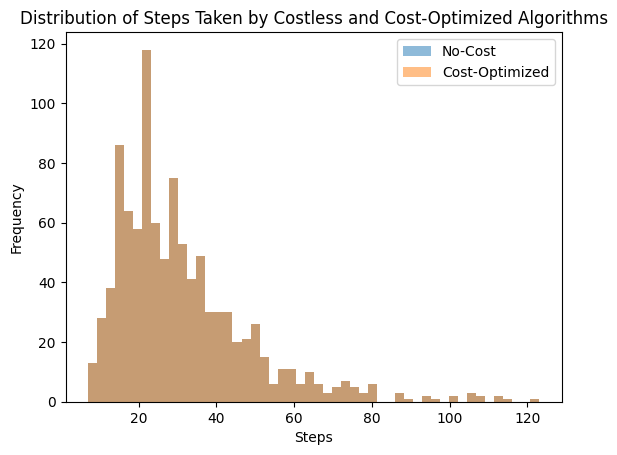

In [8]:
# Plot the two histograms, with cost/no-cost distributions in different colors
plt.hist(no_cost_steps, bins=50, alpha=0.5, label='No-Cost')
plt.hist(cost_steps, bins=50, alpha=0.5, label='Cost-Optimized')

plt.legend()
plt.title('Distribution of Steps Taken by Costless and Cost-Optimized Algorithms')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

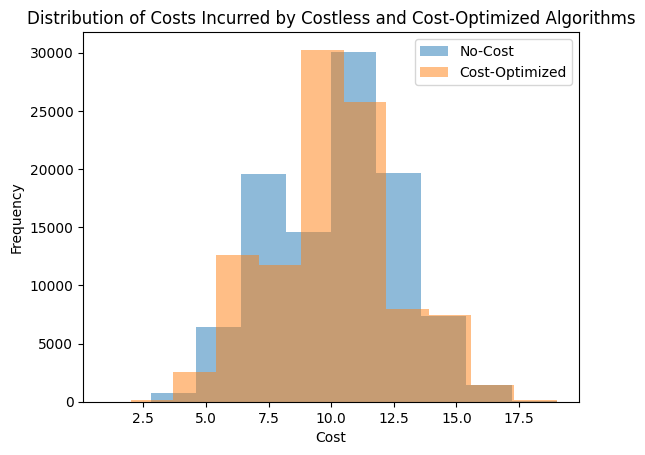

In [19]:
# Plot the two histograms, with cost/no-cost distributions in different colors
plt.hist(no_cost_costs, bins=10, alpha=0.5, label='No-Cost')
plt.hist(cost_costs, bins=10, alpha=0.5, label='Cost-Optimized')

plt.legend()
plt.title('Distribution of Costs Incurred by Costless and Cost-Optimized Algorithms')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

In [20]:
import numpy as np

# Print 5-number summary + mean for general and greedy steps taken
print('Costless Algorithm Steps Summary:')
print('Min:', np.min(no_cost_steps))
print('Q1:', np.percentile(no_cost_steps, 25))
print('Median:', np.median(no_cost_steps))
print('Mean:', np.mean(no_cost_steps))
print('Q3:', np.percentile(no_cost_steps, 75))
print('Max:', np.max(no_cost_steps))

print('\nCost-Optimized Algorithm Steps Summary:')
print('Min:', np.min(cost_steps))
print('Q1:', np.percentile(cost_steps, 25))
print('Median:', np.median(cost_steps))
print('Mean:', np.mean(cost_steps))
print('Q3:', np.percentile(cost_steps, 75))
print('Max:', np.max(cost_steps))

# Print 5-number summary + mean for general and greedy costs incurred
print('\nCostless Algorithm Costs Summary:')
print('Min:', np.min(no_cost_costs))
print('Q1:', np.percentile(no_cost_costs, 25))
print('Median:', np.median(no_cost_costs))
print('Mean:', np.mean(no_cost_costs))
print('Q3:', np.percentile(no_cost_costs, 75))
print('Max:', np.max(no_cost_costs))

print('\nCost-Optimized Algorithm Costs Summary:')
print('Min:', np.min(cost_costs))
print('Q1:', np.percentile(cost_costs, 25))
print('Median:', np.median(cost_costs))
print('Mean:', np.mean(cost_costs))
print('Q3:', np.percentile(cost_costs, 75))
print('Max:', np.max(cost_costs))

Costless Algorithm Steps Summary:
Min: 5
Q1: 18.0
Median: 26.0
Mean: 30.26955
Q3: 37.0
Max: 194

Cost-Optimized Algorithm Steps Summary:
Min: 5
Q1: 18.0
Median: 26.0
Mean: 30.30514
Q3: 37.0
Max: 215

Costless Algorithm Costs Summary:
Min: 1
Q1: 8.0
Median: 10.0
Mean: 10.09583
Q3: 12.0
Max: 19

Cost-Optimized Algorithm Costs Summary:
Min: 2
Q1: 8.0
Median: 10.0
Mean: 10.08459
Q3: 12.0
Max: 19


In [21]:
from scipy.stats import ttest_ind

alpha = 0.05

# We want to check if both the number of steps and cost is lower for the cost-optimized algorithm than the costless algorithm
t_stat, p_val = ttest_ind(cost_steps, no_cost_steps, equal_var=False, alternative='less')
print("Performing 2-sample t-test to compare costless and cost-optimized algorithms:")
print('T-Statistic:', t_stat)
print('P-Value:', p_val)


if p_val < alpha:
    print('Reject the null hypothesis: The cost-optimized algorithm is significantly lower in steps than the costless algorithm.')
else:
    print('Fail to reject the null hypothesis: The cost-optimized algorithm is not significantly lower in steps than the costless algorithm.')
    
# Perform an independent 2-sample t-test to determine if the cost-optimized algorithm is significantly lower in cost than the costless algorithm
t_stat, p_val = ttest_ind(cost_costs, no_cost_costs, equal_var=False, alternative='less')
print("\nPerforming 2-sample t-test to compare costless and cost-optimized algorithms:")
print('T-Statistic:', t_stat)
print('P-Value:', p_val)

if p_val < alpha:
    print('Reject the null hypothesis: The cost-optimized algorithm is significantly lower in cost than the costless algorithm.')
else:
    print('Fail to reject the null hypothesis: The cost-optimized algorithm is not significantly lower in cost than the costless algorithm.')

Performing 2-sample t-test to compare costless and cost-optimized algorithms:
T-Statistic: 0.4554662708976157
P-Value: 0.6756128388781277
Fail to reject the null hypothesis: The cost-optimized algorithm is not significantly lower in steps than the costless algorithm.

Performing 2-sample t-test to compare costless and cost-optimized algorithms:
T-Statistic: -1.0088675171154593
P-Value: 0.15651969796452994
Fail to reject the null hypothesis: The cost-optimized algorithm is not significantly lower in cost than the costless algorithm.
